## Individual Data

This notebook will assess the relationship between mental health and unemployment using individual data from kaggle.com rather than state-aggregated metrics.

In [62]:
# Import Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem

df_path = "Kaggle\Kaggle_data.csv"

In [63]:
# Load the data
df = pd.read_csv(df_path)
df.head()

,I am currently employed at least part-time,I identify as having a mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,...,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender,Household Income,Region,Device Type
0,0,0,High School or GED,0,0,0.0,0,1,0,1,...,1.0,0.0,1.0,0.0,0.0,30-44,Male,"$25,000-$49,999",Mountain,Android Phone / Tablet
1,1,1,Some Phd,1,0,0.0,0,1,0,0,...,0.0,0.0,1.0,0.0,1.0,18-29,Male,"$50,000-$74,999",East South Central,MacOS Desktop / Laptop
2,1,0,Completed Undergraduate,1,0,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$150,000-$174,999",Pacific,MacOS Desktop / Laptop
3,0,0,Some Undergraduate,1,0,NaN,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$25,000-$49,999",New England,Windows Desktop / Laptop
4,1,1,Completed Undergraduate,1,1,35.0,1,1,0,1,...,1.0,1.0,1.0,1.0,1.0,30-44,Male,"$25,000-$49,999",East North Central,iOS Phone / Tablet


In [64]:
# Print the columns for reference
df.columns

Index(['I am currently employed at least part-time',
       'I identify as having a mental illness', 'Education',
       'I have my own computer separate from a smart phone',
       'I have been hospitalized before for my mental illness',
       'How many days were you hospitalized for your mental illness',
       'I am legally disabled', 'I have my regular access to the internet',
       'I live with my parents', 'I have a gap in my resume',
       'Total length of any gaps in my resume in�months.',
       'Annual income (including any social welfare programs) in USD',
       'I am unemployed', 'I read outside of work and school',
       'Annual income from social welfare programs', 'I receive food stamps',
       'I am on section 8 housing',
       'How many times were you hospitalized for your mental illness',
       'Lack of concentration', 'Anxiety', 'Depression', 'Obsessive thinking',
       'Mood swings', 'Panic attacks', 'Compulsive behavior', 'Tiredness',
       'Age', 'Gender

In [65]:
# Create an index for each person that aggregates their mental health symptoms - the higher this index, the more of these symptoms they reported.
df["Mental_Health_Index"] = df["Lack of concentration"] + df["Anxiety"] + df["Depression"] + df["Obsessive thinking"] + df["Mood swings"] + df["Panic attacks"] + df["Compulsive behavior"]

In [66]:
# Change some column names to be more managable
df["Unemployed"] = df["I am unemployed"]
df["Mental_Illness"] = df["I identify as having a mental illness"]

In [67]:
df_clean = df[["Unemployed", "Mental_Illness", "Mental_Health_Index", "Region"]]
df_clean.describe()

,Unemployed,Mental_Illness,Mental_Health_Index
count,334.000000,334.000000,333.00000
mean,0.257485,0.239521,1.18018
std,0.437905,0.427431,1.85400
min,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.00000
75%,1.000000,0.000000,2.00000
max,1.000000,1.000000,7.00000


In [68]:
# Group the data by region and see if there are any that stand out. We can compare this output with heatmaps from the state data.
region_group = df_clean.groupby(by = ["Region"])


unemp = region_group["Unemployed"].sum()
mhi = region_group["Mental_Health_Index"].mean()
mi = region_group["Mental_Illness"].sum()

region_sum = {
    "Unemployment Count": unemp,
    "MHI Average": mhi,
    "Mental Illness Count": mi
}

pd.DataFrame(region_sum)

,Unemployment Count,MHI Average,Mental Illness Count
Region,,,
East North Central,19,1.100000,10
East South Central,6,1.842105,8
Middle Atlantic,9,0.892857,14
Mountain,11,1.406250,10
New England,6,0.857143,5
Pacific,13,1.200000,12
South Atlantic,8,0.952381,8
West North Central,5,1.923077,3
West South Central,9,1.593750,10


In [69]:
# Create a 2x2 crosstabulation of mental illness and employment
data_crosstab = pd.crosstab(df['Unemployed'],
                            df['Mental_Illness'], 
                            margins = False)

data_crosstab

Mental_Illness,0,1
Unemployed,,
0,197,51
1,57,29


In [70]:
data_crosstab1 = pd.crosstab(df['Unemployed'],
                            df['Mental_Illness'], 
                            margins = True, normalize = 'index')

data_crosstab1

Mental_Illness,0,1
Unemployed,,
0,0.794355,0.205645
1,0.662791,0.337209
All,0.760479,0.239521


In [71]:
data_crosstab2 = pd.crosstab(df['Unemployed'],
                            df['Mental_Illness'], 
                            margins = True, normalize = 'columns')

data_crosstab2

Mental_Illness,0,1,All
Unemployed,,,
0,0.775591,0.6375,0.742515
1,0.224409,0.3625,0.257485


In [72]:
# Visualize 2x2 table as pie charts
dfc = pd.DataFrame({
    "No MI" : [197,57],
    "Diagnosed MI" : [51,29]
}, index = ["Employed", "Unemployed"])
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, Employed to Unemployed
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   No MI         2 non-null      int64
 1   Diagnosed MI  2 non-null      int64
dtypes: int64(2)
memory usage: 48.0+ bytes


<Figure size 432x288 with 0 Axes>

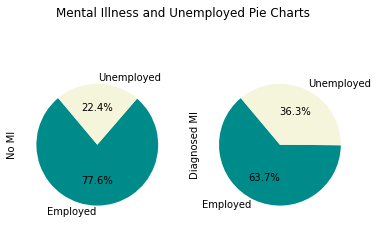

In [74]:
my_colors = ['darkcyan','beige']

plt.figure()
dfc.plot.pie(title='Mental Illness and Unemployed Pie Charts', subplots=True, colors = my_colors, legend = False, autopct= '%1.1f%%', startangle = 130)
plt.savefig("MIvUnemp_pies.pdf")

In [75]:
# Perform Fisher's exact test to assess statistical significance of this difference in proportions
from scipy.stats import fisher_exact
oddsr, p = fisher_exact(data_crosstab, alternative='two-sided')
print(f"{oddsr} , p = {p}")

1.9652562779497764 , p = 0.018596040841831637


The next few cells, we tried using plt.boxplot to make boxplots of the Mental Health Indices by employment status but were unsuccessful

{'whiskers': [<matplotlib.lines.Line2D at 0x15a2a296f40>,
 'caps': [<matplotlib.lines.Line2D at 0x15a2a2a5640>,
 'boxes': [<matplotlib.lines.Line2D at 0x15a2a296be0>,
 'medians': [<matplotlib.lines.Line2D at 0x15a2a2a5d00>,
 'fliers': [<matplotlib.lines.Line2D at 0x15a2a2b10d0>,
 'means': []}

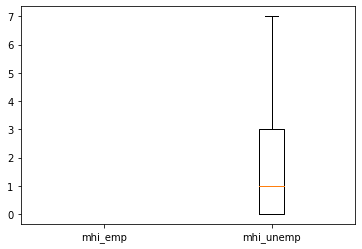

In [76]:
mhi_emp = df.loc[df["Unemployed"] == 0]["Mental_Health_Index"]

mhi_unemp = df.loc[df["Unemployed"] == 1]["Mental_Health_Index"]
data = [mhi_emp, mhi_unemp]

plt.boxplot(data, labels=["mhi_emp", "mhi_unemp"])


In [77]:
print(mhi_emp.max())
print(mhi_emp.mean())
print(mhi_emp.median())
quartiles = mhi_emp.quantile([.25,.5,.75])
print(quartiles)

7.0
0.9635627530364372
0.0
0.25    0.0
0.50    0.0
0.75    1.0
Name: Mental_Health_Index, dtype: float64


In [78]:
print(mhi_unemp.max())
print(mhi_unemp.mean())
print(mhi_unemp.median())
quartiles = mhi_unemp.quantile([.25,.5,.75])
print(quartiles)

7.0
1.802325581395349
1.0
0.25    0.0
0.50    1.0
0.75    3.0
Name: Mental_Health_Index, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x15a2a31b340>,
 'caps': [<matplotlib.lines.Line2D at 0x15a2a31ba00>,
 'boxes': [<matplotlib.lines.Line2D at 0x15a2a30dfd0>,
 'medians': [<matplotlib.lines.Line2D at 0x15a2a328100>,
 'fliers': [<matplotlib.lines.Line2D at 0x15a2a328460>,
 'means': []}

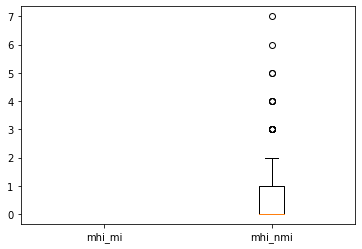

In [79]:
mhi_mi = df.loc[df["Mental_Illness"] == 1]["Mental_Health_Index"]

mhi_nmi = df.loc[df["Mental_Illness"] == 0]["Mental_Health_Index"]
data = [mhi_mi, mhi_nmi]

plt.boxplot(data, labels=["mhi_mi", "mhi_nmi"])

In [80]:
print(mhi_mi.max())
print(mhi_mi.min())
print(mhi_mi.mean())
print(mhi_mi.median())
quartiles = mhi_mi.quantile([.25,.5,.75])
print(quartiles)

7.0
0.0
3.430379746835443
3.0
0.25    2.0
0.50    3.0
0.75    5.0
Name: Mental_Health_Index, dtype: float64


Here, we finally get boxplots using pandas.

([<matplotlib.axis.XTick at 0x15a2a36cf10>,
 [Text(1, 0, 'Employed'), Text(2, 0, 'Not Employed')])

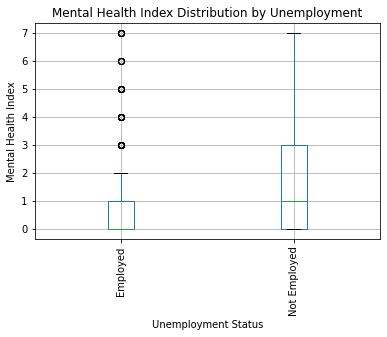

In [81]:
df_mhi = df[["Mental_Health_Index", "Unemployed"]]
df_mhi.boxplot(by = "Unemployed")
plt.title("Mental Health Index Distribution by Unemployment")
plt.suptitle("")
plt.ylabel("Mental Health Index")
plt.xlabel("Unemployment Status")
plt.xticks([1,2], labels = ["Employed", "Not Employed"], rotation = 90)

([<matplotlib.axis.XTick at 0x2741ad121c0>,
 [Text(1, 0, 'Not Diagnosed'), Text(2, 0, 'Diagnosed')])

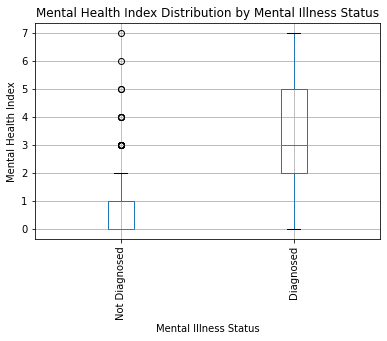

In [ ]:
df_mhi = df[["Mental_Health_Index", "Mental_Illness"]]
df_mhi.boxplot(by = "Mental_Illness")

plt.title("Mental Health Index Distribution by Mental Illness Status")
plt.suptitle("")
plt.ylabel("Mental Health Index")
plt.xlabel("Mental Illness Status")
plt.xticks([1,2], labels = ["Not Diagnosed", "Diagnosed"], rotation = 90)